In [1]:
from csr2d.kick3 import track_bend_with_2d_csr_transient
import numpy as np
#import time

from csr2d.beam_conversion import bmad_to_particle_group

import scipy.constants
mec2 = scipy.constants.value('electron mass energy equivalent in MeV')*1e6
c_light = scipy.constants.c
e_charge = scipy.constants.e
r_e = scipy.constants.value('classical electron radius')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Chris's parameters 
gamma = 500
rho = 1.0 # Bend radius in m

## Additional parameters
beta = (1-1/gamma**2)**(1/2)
mc2 = 510998.950
p0c = gamma * beta * mc2  # in eV

#sigma_x  = 10e-6
#sigma_z  = 10e-6

nz = 200
nx = 200

In [3]:
np.random.seed(0)

# Number of macro particles
Np = 1000000

# charge of one macro-particle
Nb = 6.25e9
Q = e_charge * Nb
charges = np.ones(Np)*Q/Np  

# Define an uncorrelated beam first
sigma_x = 10e-6
sigma_xp = 10e-6
sigma_y = 10e-6
sigma_yp = 10e-6
sigma_z = 10e-6
sigma_delta = 0

beam = np.zeros((6, Np))

beam[0] = np.random.normal(0, sigma_x , size=(1, Np))
beam[1] = np.random.normal(0, sigma_xp , size=(1, Np))
beam[2] = np.random.normal(0, sigma_y , size=(1, Np))
beam[3] = np.random.normal(0, sigma_yp , size=(1, Np))
beam[4] = np.random.normal(0, sigma_z , size=(1, Np))
beam[5] = np.random.normal(0, sigma_delta , size=(1, Np))

p0c = gamma * beta * mc2  # in eV
P = bmad_to_particle_group(beam, p0c = p0c, t_ref = 0, charges = charges, verbose=False)

In [39]:
ob = track_bend_with_2d_csr_transient(P, p0c=p0c, gamma=gamma, L=0.15, g=1, g_err=0, N_step=6, s0=0, nz=200, nx=200, xlim=None, zlim=None,
                           CSR_on=True, steady_state=False, CSR_1D_only = False, energy_kick_on=True, xp_kick_on=True, bend_name='the bend', 
                           keep_Pin=True, debug=True, save_all_P=False, save_all_wake=True, save_all_P_h5=None, bend_track_parallel=True)

Tracking through the bend in the 1 th step starting at s= 0 m
Begin computing transient wakes at entrance angle phi = 0.012499999999999999
Depositing particles takes: 0.04249072074890137 s
Computing case B field grids takes: 2.0712809562683105 s
Case A field grids computed!
mappable functions for field grids defined
Convolution takes: 22.134687185287476 s
Interpolation with map_coordinates takes: 0.36898064613342285 s
Applying energy kick...
Applying xp_kick...
Tracking through the bend in the 2 th step starting at s= 0.024999999999999998 m
Begin computing transient wakes at entrance angle phi = 0.0375
Depositing particles takes: 0.04650235176086426 s
Computing case B field grids takes: 1.8349995613098145 s
Case A field grids computed!
mappable functions for field grids defined
Convolution takes: 19.80608081817627 s
Interpolation with map_coordinates takes: 0.3856930732727051 s
Applying energy kick...
Applying xp_kick...
Tracking through the bend in the 3 th step starting at s= 0.04999

# Plotting

In [28]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 16}
matplotlib.rc('font', **font)

from mpl_toolkits import mplot3d

Text(0.5, 0.92, 'Ws(z,x) at the 2 th tracking step')

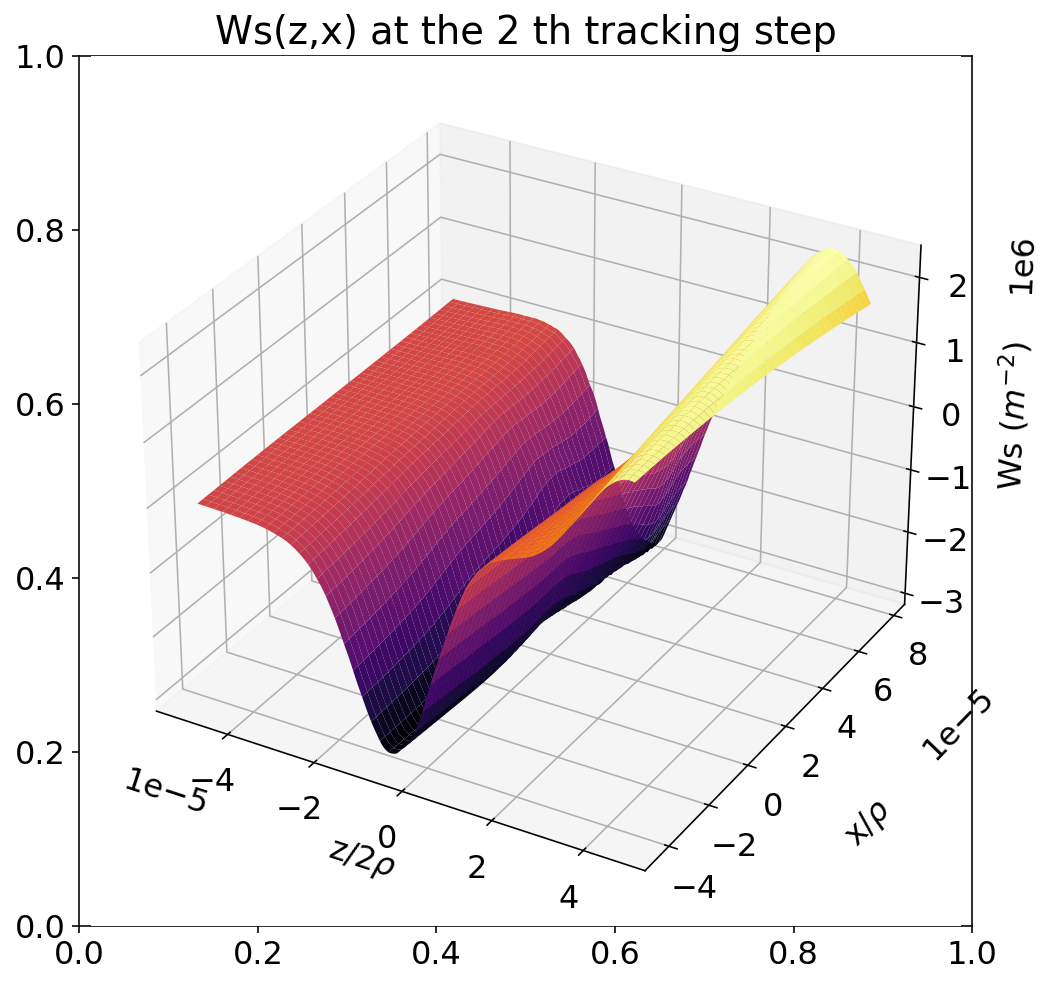

In [44]:
i_step = 2

Z,X = np.meshgrid(ob['zvec_list'][i_step], ob['xvec_list'][i_step],indexing='ij') 

fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot_surface(Z, X, ob['Ws_list'][i_step] , cmap='inferno')
ax.set_xlabel(r'z/2$\rho$')
ax.set_ylabel(r'x/$\rho$',labelpad=20)
ax.set_zlabel('Ws ($m^{-2}$)',labelpad=10)
ax.set_title(f'Ws(z,x) at the {i_step} th tracking step')

Text(0.5, 0.92, 'Wx(z,x) at the 3 th tracking step')

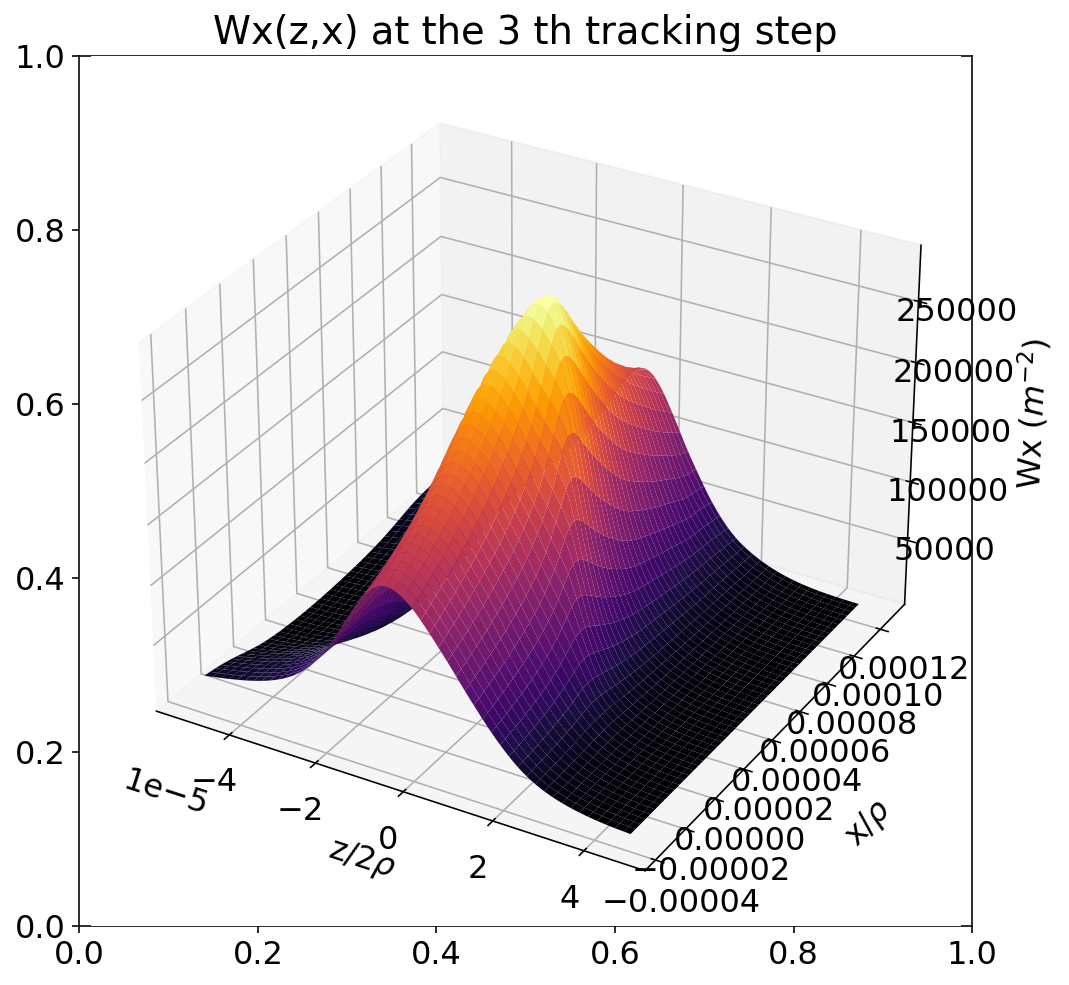

In [48]:
i_step = 3

Z,X = np.meshgrid(ob['zvec_list'][i_step], ob['xvec_list'][i_step],indexing='ij') 

fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot_surface(Z, X, ob['Wx_list'][i_step] , cmap='inferno')
ax.set_xlabel(r'z/2$\rho$')
ax.set_ylabel(r'x/$\rho$',labelpad=20)
ax.set_zlabel('Wx ($m^{-2}$)',labelpad=16)
ax.set_title(f'Wx(z,x) at the {i_step} th tracking step')

Text(0.5, 1.0, 'Wx(z) along x =0 \n at the 1 th tracking step')

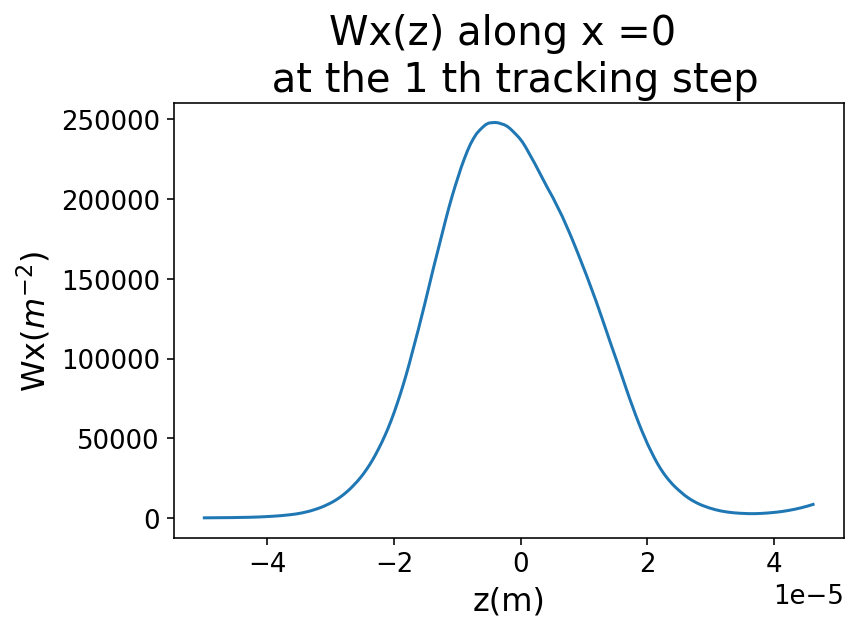

In [23]:
i_step = 1

x_observe = 0
x_observe_index = np.argmin(np.abs(ob['xvec_list'][i_step] - x_observe))


plt.plot(ob['zvec_list'][i_step], ob['Wx_list'][i_step][:,100])

plt.xlabel('z(m)', fontsize=16)
plt.ylabel('Wx($m^{-2}$)', fontsize=16)
plt.title(f'Wx(z) along x ={x_observe} \n at the {i_step} th tracking step',  fontsize=20)
#plt.legend()

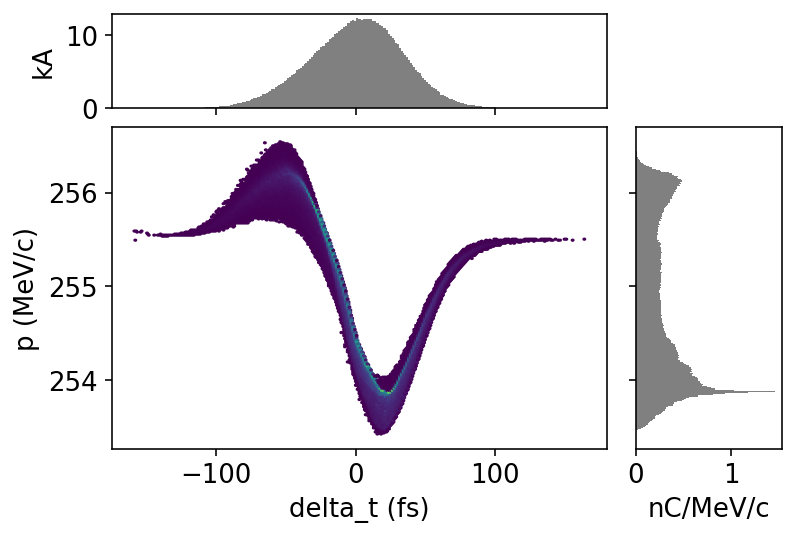

In [16]:
ob['Pout'].plot('delta_t', 'p', bins=250)